In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import geopandas as gpd
import time

from shapely.geometry import MultiPolygon, MultiPoint
from data.test_data_2d import barriers, pts, example_route, example_space, islas

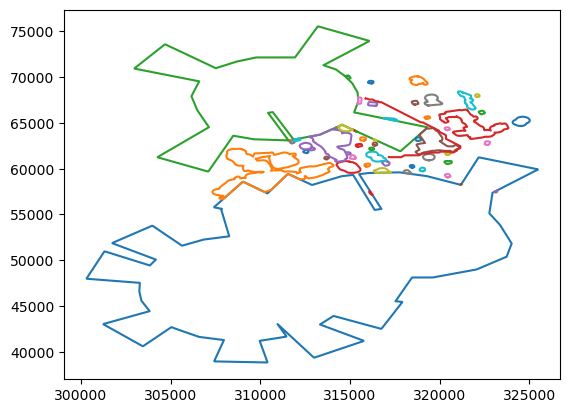

In [13]:
#for geom in clokes:
#    plt.plot(*geom.exterior.xy)
#plt.scatter([START.x, END.x],[START.y,END.y])
for bld in example_space.geoms:
    plt.plot(*bld.exterior.xy)
for bs in example_route.geoms:
    plt.plot(bs.xy[0],bs.xy[1])
plt.show()

<AxesSubplot:>

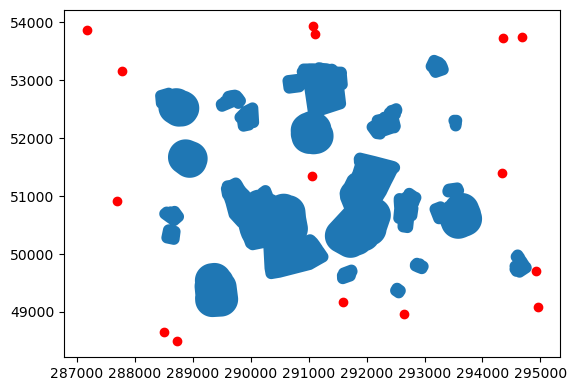

In [5]:
geofences = gpd.GeoSeries(MultiPolygon(barriers['clokes']))
r = ['bl', 
    'tr',
    'tl', 
    'br',
    'bc', 
    'tc',
    'e']
r = 'bltrtlbrbctcabcdefghi'
points = gpd.GeoSeries(MultiPoint([pt[1] for pt in pts.items() if pt[0] in r]))
fig, ax = plt.subplots() 
geofences.plot(ax=ax)
points.plot(color='r', ax=ax)

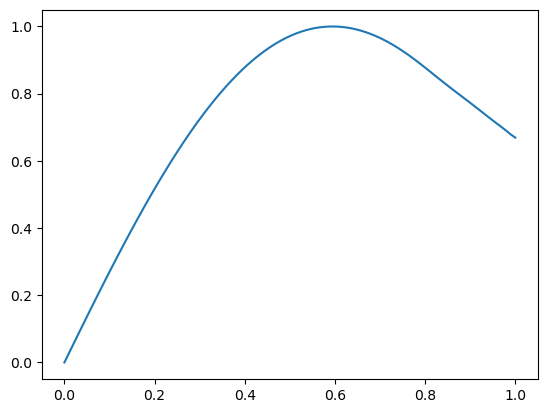

In [1]:
import operator
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import gp
from data.test_data_2d import barrier_set, clokes, journeys, islas
from gptrajec import transform_2d

pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
#pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)
pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
# we will pass X coordinate and expect Y coordinate
# later, we will pass X to two different functions, yielding Y and Z
pset.renameArguments(ARG0='x')
#GEOFENCES = islas
#START, END = journeys['grc1']
X = np.linspace(0,1,100)
#interval = (START.coords[0], END.coords[0])
#interval = np.array([list(ele) for ele in list(interval)])
#optimal 5000:
sol = 'sin(mul(mul(cos(sub(x, x)), x), add(cos(mul(mul(mul(x, mul(sub(cos(add(add(cos(sub(1, mul(add(x, add(x, -1)), cos(add(x, -1))))), \
    add(cos(sub(1, add(mul(x, x), add(x, -1)))), -1)), mul(sub(add(cos(sub(1, mul(x, x))), add(x, -1)), neg(add(cos(sub(1, x)), add(x, -1)))),\
    cos(cos(sub(sin(x), cos(sub(1, x)))))))), add(add(cos(sub(1, add(add(x, add(x, -1)), add(x, -1)))), add(add(cos(sub(1, add(x, add(x, -1)))),\
    add(mul(cos(sub(1, x)), x), -1)), -1)), add(cos(sub(1, add(mul(x, x), add(x, -1)))), add(mul(cos(add(x, -1)), add(cos(sub(1, x)),\
    add(x, -1))), -1)))), mul(mul(mul(cos(sub(x, add(cos(add(x, -1)), add(x, -1)))), x), mul(1, mul(mul(add(mul(cos(sub(x, x)),\
    mul(mul(x, 1), x)), add(x, -1)), x), x))), mul(x, x)))), mul(x, x)), mul(add(mul(mul(cos(sub(1, add(add(cos(sub(1,\
    add(mul(x, x), add(x, -1)))), add(add(cos(sub(1, x)), add(x, -1)), -1)), add(mul(cos(add(mul(x, x), -1)), add(cos(sub(1, x)),\
    add(x, -1))), -1)))), mul(add(x, add(x, -1)), x)), mul(mul(cos(cos(add(cos(sub(x, x)), cos(sin(mul(mul(x, x),\
    mul(x, x))))))), mul(x, -1)), mul(cos(sub(1, mul(cos(add(add(x, add(x, -1)), -1)), add(cos(sub(1, mul(x, x))),\
    add(x, -1))))), x))), mul(cos(sub(mul(mul(cos(cos(add(add(mul(x, x), add(x, -1)), cos(sin(x))))), x),\
    mul(x, mul(mul(add(x, add(x, -1)), x), x))), mul(mul(add(cos(sub(1, x)), add(x, -1)), mul(cos(add(add(mul(x, x),\
    add(x, -1)), -1)), add(cos(sub(1, x)), add(x, -1)))), mul(mul(add(add(cos(sub(1, x)), add(x, -1)),\
    add(x, -1)), mul(add(cos(sub(1, x)), add(x, -1)), mul(add(x, add(x, -1)), x))), mul(mul(cos(sub(1, mul(x, x))),\
    mul(cos(sub(1, x)), x)), mul(add(cos(sub(1, x)), add(x, -1)), mul(add(x, add(x, -1)),\
    x))))))), x)), mul(cos(cos(cos(add(mul(mul(mul(add(x, add(x, -1)), add(cos(sub(1, x)),\
    add(x, -1))), add(cos(sub(1, mul(x, x))), add(x, -1))), add(cos(sub(1, mul(x, x))),\
    add(mul(cos(sub(1, x)), x), -1))), sin(sub(sin(mul(add(x, add(x, -1)), mul(mul(x, x),\
    mul(x, x)))), neg(add(x, -1)))))))), add(1, mul(cos(sin(cos(x))), add(mul(mul(mul(mul(mul(x, cos(sub(1, x))), mul(cos(sub(1, x)), \
    mul(mul(x, x), x))), mul(mul(mul(x, x), add(mul(x, x), add(x, -1))), mul(mul(mul(x, x), mul(x, x)), mul(x, mul(x, x))))), \
    mul(mul(mul(mul(mul(x, x), 1), mul(1, mul(x, x))), mul(mul(mul(x, x), x), cos(sub(1, x)))), mul(mul(x, mul(x, mul(x, x))), \
    mul(cos(sub(1, x)), neg(-1))))), mul(mul(mul(add(cos(sub(1, x)), add(x, -1)), mul(add(mul(x, x), add(x, -1)), mul(x, x))), \
    mul(x, mul(add(x, add(x, -1)), add(mul(x, x), add(x, -1))))), mul(x, mul(mul(1, x), mul(mul(1, mul(x, x)), add(x, add(x, -1))))))), \
    cos(sub(add(cos(sub(1, add(x, add(x, -1)))), add(x, -1)), x))))))))), sub(cos(mul(cos(-1), add(1, mul(cos(1), add(x, mul(cos(cos(cos(add(x, \
    cos(sin(x)))))), add(mul(mul(add(add(cos(sub(1, x)), add(x, -1)), add(x, -1)), mul(cos(sub(1, mul(x, x))), add(mul(x, x), add(x, -1)))), \
    mul(mul(add(cos(sub(1, x)), add(x, -1)), mul(add(x, add(x, -1)), x)), mul(cos(sub(1, mul(x, x))), mul(add(x, add(x, -1)), x)))), 1))))))), -1))))'
#with open('demo/sol.txt', 'r') as soltxt:
#    sol = soltxt.read()
ln_func = gp.compile(expr=sol, pset=pset)
y = np.array([ln_func(xc) for xc in X])
#linelist = np.array([[xc,yc] for xc,yc in zip(X,y)])
#line = transform_2d(linelist, interval)
#plt.plot(line[:,0], line[:,1])
plt.plot(X,y)
#for barrier in GEOFENCES.geoms:
#    plt.fill(*barrier.exterior.xy, alpha=0.5, fc='r', ec='none')
plt.show()


/tmp/ipykernel_18945/477734745.py:14: RuntimeWarning: invalid value encountered in divide
  return cos(x - cos(x) - sin(x)) + (cos(x) + sin(x)) + (sin(x) / sin(x))


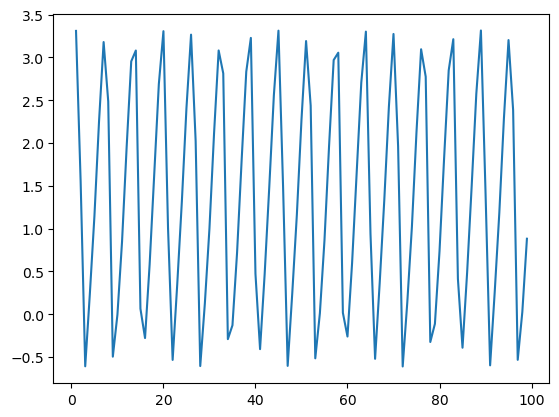

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos

SEG = 100

def alpha_func(n, t):
    # return an opacity value according to a function
    # n = current generation
    # t = total generations
    return t ** (n/t) / t

def func(x):
    return cos(x - cos(x) - sin(x)) + (cos(x) + sin(x)) + (sin(x) / sin(x))

#t = 400
#n = 100
g = np.arange(SEG)
Y = [alpha_func(s, SEG) for s in g]
Y = func(g)
plt.plot(g,Y)

In [11]:
import pyparsing as pp
import pprint
psol = '(' + sol + ')'
t1 = pp.nestedExpr(opener='(', closer=')').parseString(psol)
lst_t1 = t1.asList()
pprint.pprint(lst_t1, indent=2)

[ [ 'sin',
    [ 'mul',
      [ 'mul',
        ['cos', ['sub', ['x,', 'x']], ',', 'x'],
        ',',
        'add',
        [ 'cos',
          [ 'mul',
            [ 'mul',
              [ 'mul',
                [ 'x,',
                  'mul',
                  [ 'sub',
                    [ 'cos',
                      [ 'add',
                        [ 'add',
                          [ 'cos',
                            [ 'sub',
                              [ '1,',
                                'mul',
                                [ 'add',
                                  ['x,', 'add', ['x,', '-1']],
                                  ',',
                                  'cos',
                                  ['add', ['x,', '-1']]]]],
                            ',',
                            'add',
                            [ 'cos',
                              [ 'sub',
                                [ '1,',
                                  'add',
                 

In [5]:
import operator
import matplotlib.pyplot as plt
import networkx as nx
from deap import base, creator, gp, tools

pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.renameArguments(ARG0='x')

creator.create("Individual", gp.PrimitiveTree)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)

expr = toolbox.individual()
print(f'{expr.height=}, {len(expr)=}')
nodes, edges, labels = gp.graph(expr)

expr.height=2, len(expr)=7


In [3]:
sol.height

AttributeError: 'str' object has no attribute 'height'

In [10]:
import pygraphviz as pgv

g = pgv.AGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
g.layout(prog="dot")

for i in nodes:
    n = g.get_node(i)
    n.attr["label"] = labels[i]

g.draw("tree.pdf")

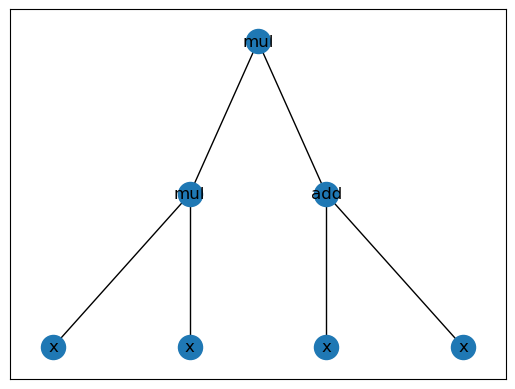

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

pos = nx.nx_agraph.graphviz_layout(g, prog="dot")


nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos, labels)
plt.show()